In [22]:
import scipy.io as sio
import pandas as pd
import numpy as np

In [23]:
data_mat = sio.loadmat('exam_data/data-qp.mat')
# check keys
data_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A', 'C', 'b', 'd'])

In [24]:
A = data_mat['A']
C = data_mat['C']
b = data_mat['b']
d = data_mat['d']

In [25]:
def is_positive_semi_def(x):
    if np.all(np.linalg.eigvals(x) > 0):
        print('positive definite')
    elif np.all(np.linalg.eigvals(x) >= 0):
        print('positive semi definite')
    else:
        print('general matrix')
    # print('eigen values:\n',np.linalg.eigvals(x))

In [26]:
alpha = 1/2
m = A.shape[0]
n = A.shape[1]

In [27]:
# P
P_A = 2*(A.T @ A)
P_C = 2*(C.T @ C)
P = np.concatenate(( np.concatenate((P_A, np.zeros_like(P_A)), axis=1),np.concatenate((np.zeros_like(P_C),P_C), axis=1) ), axis=0)
P = np.concatenate((P, np.zeros((n+1,2*n))), axis=0)     
P = np.concatenate((P, np.zeros((3*n+1,n+1))), axis=1)            
P.shape

(31, 31)

In [28]:
is_positive_semi_def(P)

positive semi definite


In [68]:
# q
q = np.concatenate(( -2*(A.T @ b) ,-2*(C.T @ d) ),axis=0)
q = np.concatenate((q,np.zeros((n+1,1))), axis=0)
q = q.reshape(q.shape[0],)
q.shape

(31,)

In [30]:
# G
G = np.concatenate((np.zeros((1,2*n)),np.ones((1,n+1))),axis=1)
G = np.concatenate((G,
        np.concatenate((np.zeros((n,n)), -1*np.identity(n),-1*np.identity(n), np.zeros((n,1))),axis=1)
        ),axis=0)
G = np.concatenate((G,
        np.concatenate((np.zeros((n,n)),  1*np.identity(n),-1*np.identity(n), np.zeros((n,1))),axis=1)
        ),axis=0)
G = np.concatenate((G,
        np.concatenate((-1*np.identity(n), np.zeros((n,n)), np.zeros((n,n)), -1*np.ones((n,1))),axis=1)
        ),axis=0)
G = np.concatenate((G,
        np.concatenate((1*np.identity(n), np.zeros((n,n)), np.zeros((n,n)), -1*np.ones((n,1))),axis=1)
        ),axis=0)
G.shape

(41, 31)

In [58]:
# h
h = np.concatenate((np.array([alpha]).reshape(1,1),np.zeros((4*n,1))), axis=0)
h = h.reshape(h.shape[0],)
h.shape

(41,)

In [32]:
# M
M = np.zeros((3*n+1,))
M.shape

(31,)

In [33]:
# g
g = np.array([0])

In [34]:
def f(x):
    return (1/2 * x.T @ P @ x) + (q.T @ x)

In [35]:
from cvxopt import matrix, solvers
sol=solvers.qp(matrix(P), matrix(q), matrix(G), matrix(h))
w = np.array(sol['x'])
p_opt = float(f(w))

     pcost       dcost       gap    pres   dres
 0: -1.6927e+01 -1.5782e+01  9e+01  9e+00  9e-01
 1: -1.6462e+01 -2.1618e+01  2e+01  2e+00  2e-01
 2: -1.2536e+01 -1.2448e+01  9e+00  7e-01  6e-02
 3: -1.0023e+01 -1.0146e+01  5e+00  3e-01  2e-02
 4: -8.6119e+00 -8.8874e+00  7e-01  3e-02  2e-03
 5: -8.5048e+00 -8.5419e+00  7e-02  2e-03  2e-04
 6: -8.5008e+00 -8.5015e+00  1e-03  2e-05  2e-06
 7: -8.5009e+00 -8.5009e+00  1e-05  2e-07  2e-08
 8: -8.5009e+00 -8.5009e+00  1e-07  2e-09  2e-10
Optimal solution found.


In [36]:
# result
x = w[0:n]
z = w[n:2*n]
print('Optimal value:', p_opt)
print('{:5}{:15} {:15}'.format('','x', 'z'))
for i in range(n):
    print('{:>12.5E} {:15.5E}'.format(x[i][0], z[i][0]))


Optimal value: -8.500918794739846
     x               z              
 1.21633E-01    -2.59405E-09
 9.14190E-02     1.60422E-10
 2.23835E-01    -5.09069E-09
 5.01055E-02     6.49523E-10
 2.23835E-01    -5.26103E-02
-2.23835E-01    -2.73284E-11
-1.90577E-02    -3.18965E-10
 1.55831E-01    -2.73922E-02
 6.52569E-02     1.13630E-10
-9.95057E-02    -1.96163E-01


In [70]:
eq_1 = ((A @ x) - b)**2
eq_2 = ((C @ z) - d)**2

sumeq_1 = np.sum(eq_1)
sumeq_2 = np.sum(eq_2)

eq_min = eq_1 + eq_2
sumeq_min = np.sum(eq_min)
square_result = np.sqrt(sumeq_min)
# print(eq_1)
# print(eq_2)
print('sum square value of residual_1 :', sumeq_1)
print('sum square value of residual_2 :', sumeq_2)
print('minimum function value:', sumeq_min)

sum square value of residual_1 : 8.33124078485881
sum square value of residual_2 : 16.582431795491175
minimum function value: 24.91367258034998


<AxesSubplot:>

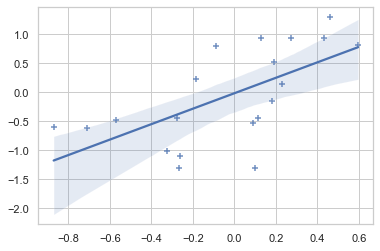

In [71]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

x_plot= A @ x
y_plot = b

sns.regplot(x=x_plot, y=y_plot, marker="+")

<AxesSubplot:>

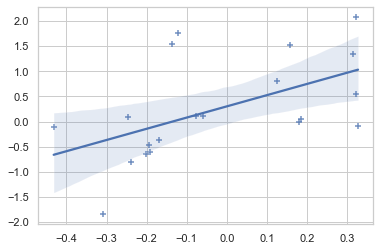

In [72]:
v_plot= C @ z
w_plot = d

sns.regplot(x=v_plot, y=w_plot, marker="+")

In [75]:
from numpy import linalg as LA

print('norm infinity value of x :', LA.norm(x, np.inf))
print('norm 1 value of z :', LA.norm(z, 1))
constraint_result = LA.norm(x, np.inf) + LA.norm(z, 1) 
print('constraint value :', constraint_result)

norm infinity value of x : 0.22383461824833273
norm 1 value of z : 0.27616538282951053
constraint value : 0.5000000010778433
